In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb 
%matplotlib inline

## Data Wrangling
### in this section of report , we will load the data ,cheack for cleanliness , then trim and clean dataset for analysis  

### General Properties  

In [2]:
# loading data and printing out a few lines , perform operations to inspect data .
# type and look for instances of missing or possibly errant data .
data_set=pd.read_csv("Appointments_Data.csv")
data_set.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df=data_set.copy()

In [4]:
# exploring the shape of data 
df.shape

(110527, 14)

In [5]:
# check for duplications 
df.duplicated().sum()

0

In [6]:
# check the unique values 
df['PatientId'].nunique()

62299

In [7]:
# check the duplication at pationId column
df['PatientId'].duplicated().sum()

48228

In [8]:
# check the number of duplicated patientId and NoShow
# to check if ther were patientsId  duplicated but differ in the No show status
df[['PatientId','No-show']].duplicated().sum()

38710

In [9]:
# searching for missing values or any issue to be handeled 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
# get informatino about our data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
# identifying the rows that containing -1 at the age column
df.query("Age == -1")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Data Cleaning 

In [12]:
# removing -1 age value 
df.drop(index=99832,inplace=True)

In [13]:
# check for the removing of -1  age value
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
# correct of columns name 
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# removing duplicated pationtID with duplicated shwoing status,Leaving the duplicated patinoId if they differ in showing status 
# as the same patient may have several appointments , attend some and absence from others 
df.drop_duplicates(["PatientId","No_show"],inplace=True)

In [16]:
df[["PatientId","No_show"]].duplicated().sum()

0

In [17]:
# droping unnecessary columns
df.drop(["PatientId","AppointmentID","ScheduledDay","AppointmentDay"],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Exploratory Data Analysis
#### Now that we've trimmed and cleand data , ready to move to exploration . computing statistics and creating visuallizations with the goal of addressing the research questions .

### General look

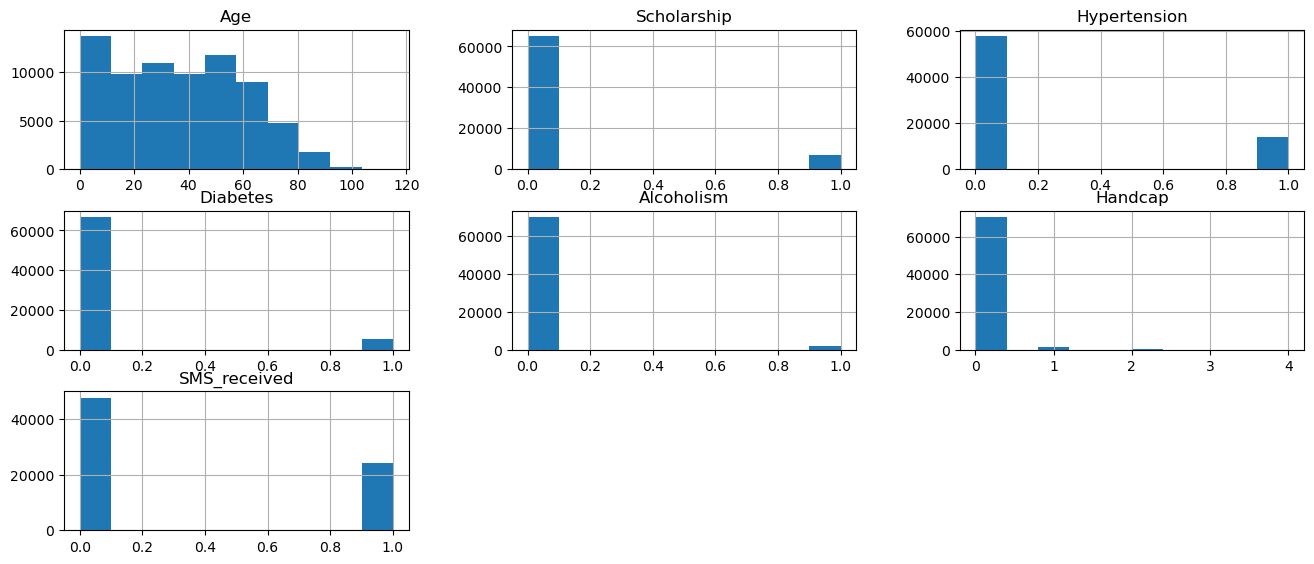

In [18]:
df.hist(figsize=(16,6.5));

In [19]:
# dividing the patients to 2 groups according to showing or not
show_df=df[df["No_show"]=="No"]
NoShow_df=df[df["No_show"]=="Yes"]
print("Number of the valeus that is not null at the attendace people : \n\n",show_df.count(),"\n")
print("Number of the valeus that is not null at the absence people people : \n\n",NoShow_df.count(),"\n")

Number of the valeus that is not null at the attendace people : 

 Gender           54153
Age              54153
Neighbourhood    54153
Scholarship      54153
Hypertension     54153
Diabetes         54153
Alcoholism       54153
Handcap          54153
SMS_received     54153
No_show          54153
dtype: int64 

Number of the valeus that is not null at the absence people people : 

 Gender           17663
Age              17663
Neighbourhood    17663
Scholarship      17663
Hypertension     17663
Diabetes         17663
Alcoholism       17663
Handcap          17663
SMS_received     17663
No_show          17663
dtype: int64 



In [20]:
print(show_df.mean(),"\n")
print(NoShow_df.mean(),"\n")

Age             37.229166
Scholarship      0.091334
Hypertension     0.202944
Diabetes         0.072868
Alcoholism       0.023600
Handcap          0.020904
SMS_received     0.297232
dtype: float64 

Age             34.376267
Scholarship      0.108419
Hypertension     0.170922
Diabetes         0.065108
Alcoholism       0.029440
Handcap          0.017777
SMS_received     0.453094
dtype: float64 



C:\Users\fareed\AppData\Local\Temp\ipykernel_2272\1828939499.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(show_df.mean(),"\n")
C:\Users\fareed\AppData\Local\Temp\ipykernel_2272\1828939499.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(NoShow_df.mean(),"\n")


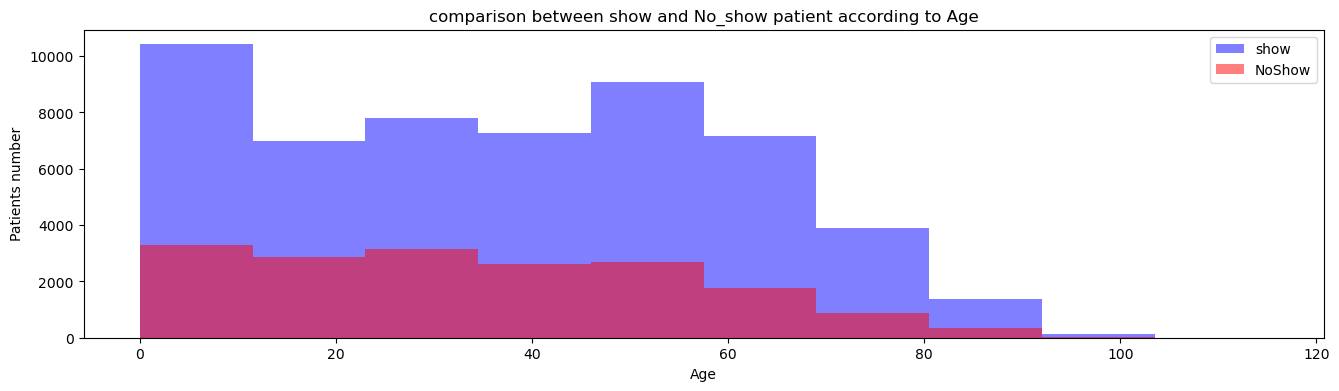

In [21]:
# check if the age affect at the attendance or no 
def attendncee(df_show,df_noShow,col_name,tit,xla,yla):
    plt.figure(figsize=(16,4))
    plt.hist(df_show[col_name],alpha=.5,color="blue",bins=10,label="show")
    plt.hist(df_noShow[col_name],alpha=.5,color="red",bins=10,label="NoShow")
   #plt.xticks(np.arange(0,120,step=5))
    plt.legend()
    plt.title(tit)
    plt.xlabel(xla)
    plt.ylabel(yla)
    plt.show()
    
attendncee(show_df,NoShow_df,"Age","comparison between show and No_show patient according to Age","Age","Patients number")    

##### Children aged 10 and under have the highest attendance.
##### Those aged 48 to 58 have the second highest attendance.
##### Attendance begins to decrease as people get older

In [22]:
show_df.groupby(['Hypertension','Diabetes'])["Age"].mean()

Hypertension  Diabetes
0             0           30.713360
              1           53.701370
1             0           60.270517
              1           63.764303
Name: Age, dtype: float64

In [23]:
NoShow_df.groupby(['Hypertension','Diabetes'])["Age"].mean()

Hypertension  Diabetes
0             0           28.768691
              1           49.481172
1             0           58.650380
              1           62.913282
Name: Age, dtype: float64

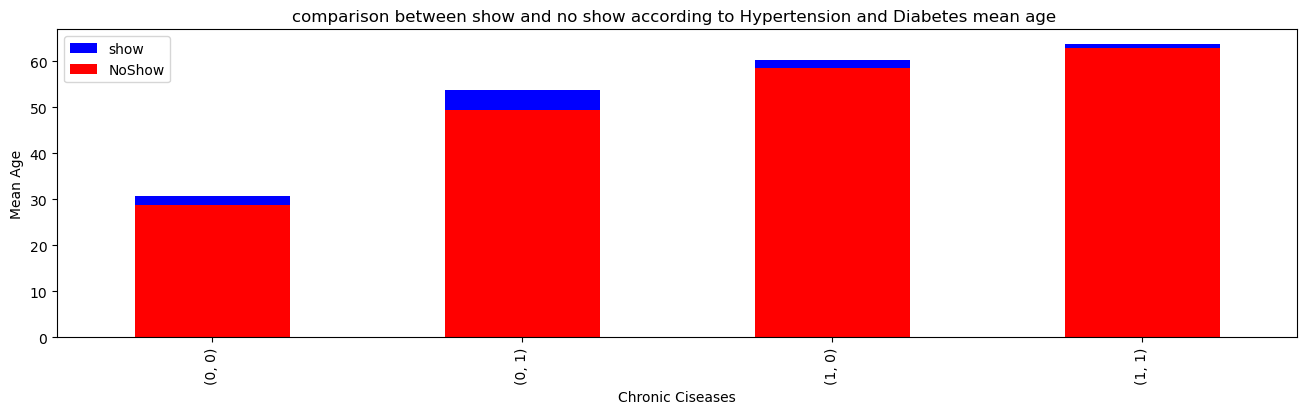

In [24]:
plt.figure(figsize=(16,4))
show_df.groupby(['Hypertension','Diabetes'])["Age"].mean().plot(kind="bar",color="blue",label="show")
NoShow_df.groupby(['Hypertension','Diabetes'])["Age"].mean().plot(kind="bar",color="red",label="NoShow")
plt.legend(loc="upper left")
plt.title("comparison between show and no show according to Hypertension and Diabetes mean age ")
plt.xlabel("Chronic Ciseases")
plt.ylabel("Mean Age")
plt.show()


#### There is no significant relationship between the mean age of patients with hypertension, patients with diabetes, or patients with either condition, and whether or not they show up for their appointments

In [25]:
def Attendance_Gender(df,col_name):
    plt.figure(figsize=[12,4])
    df[col_name].value_counts(normalize=True).plot(kind="pie",label="show")
    plt.legend()
    plt.title("comparison between attendance by gender")
    plt.xlabel("Gender")
    plt.ylabel("patients Number")
    plt.show()


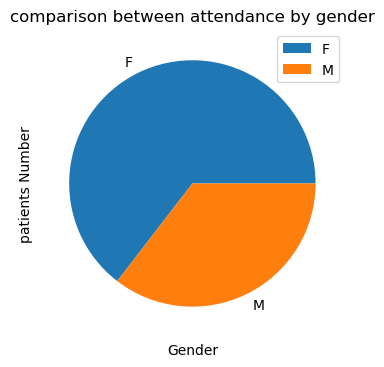

In [26]:
Attendance_Gender(show_df,"Gender")    

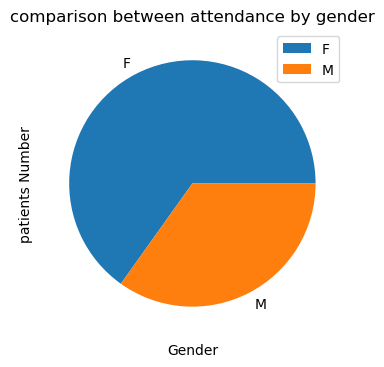

In [27]:
Attendance_Gender(NoShow_df,"Gender")


#### The proportion of female patients is higher than the proportion of male patients, both among the patients who attend their appointments and the patients who do not attend their appointments So  Gender has no clear effect on attendance 

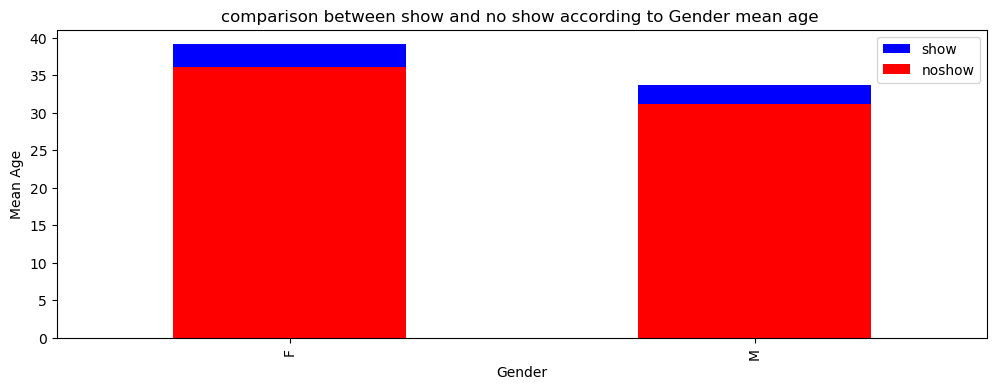

In [28]:
# does Gender and Age affect together at the attendance
plt.figure(figsize=[12,4])
show_df.groupby("Gender")["Age"].mean().plot(kind="bar",color="blue",label='show')
NoShow_df.groupby("Gender")["Age"].mean().plot(kind="bar",color="red",label='noshow')
plt.legend()
plt.title("comparison between show and no show according to Gender mean age ")
plt.xlabel("Gender")
plt.ylabel("Mean Age")
plt.show()


In [29]:
print("\n***Show Data Gender Mean***\n",show_df.groupby("Gender")["Age"].mean())
print("\n***No_Show Data Gender Mean***\n ",NoShow_df.groupby("Gender")["Age"].mean())



***Show Data Gender Mean***
 Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64

***No_Show Data Gender Mean***
  Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64


In [30]:
print("\n***Show Data Gender Median***\n",show_df.groupby("Gender")["Age"].median())
print("\n***No_Show Data Gender Median***\n",NoShow_df.groupby("Gender")["Age"].median())


***Show Data Gender Median***
 Gender
F    39.0
M    32.0
Name: Age, dtype: float64

***No_Show Data Gender Median***
 Gender
F    34.0
M    29.0
Name: Age, dtype: float64


#### There is no significant relationship between a patient's gender  age and whether or not they show up for their scheduled appointments 
#### the mean and the median of the sexs age  are almost the same  

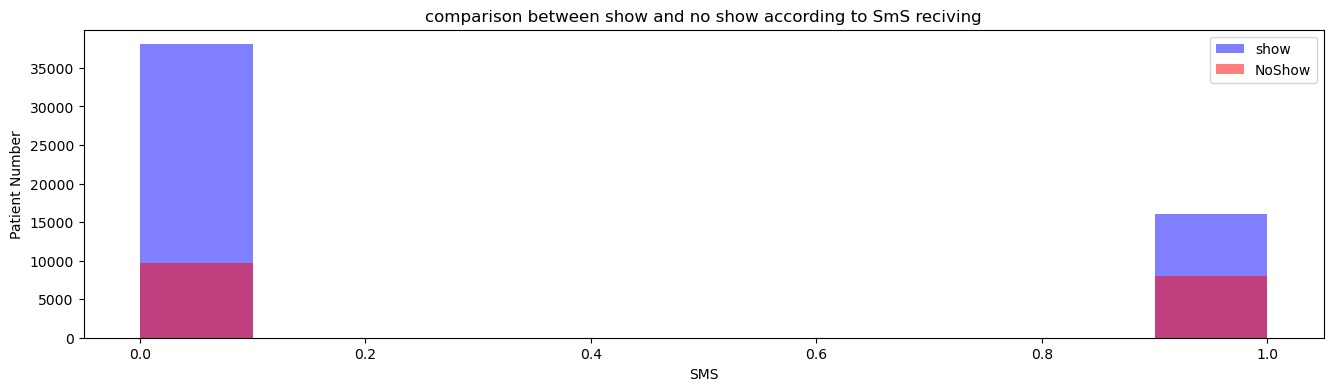

In [31]:
attendncee(show_df,NoShow_df,"SMS_received","comparison between show and no show according to SmS reciving","SMS","Patient Number")

#### Number of showing patients without reciving sms is greater than shoing patients with reciving SMS, we need to revisite our sms campain 

In [32]:
show_df["Neighbourhood"].value_counts()

JARDIM CAMBURI       3666
MARIA ORTIZ          2845
JARDIM DA PENHA      2160
RESISTÊNCIA          2098
ITARARÉ              1745
                     ... 
PONTAL DE CAMBURI      38
ILHA DO BOI            21
AEROPORTO               6
ILHA DO FRADE           4
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

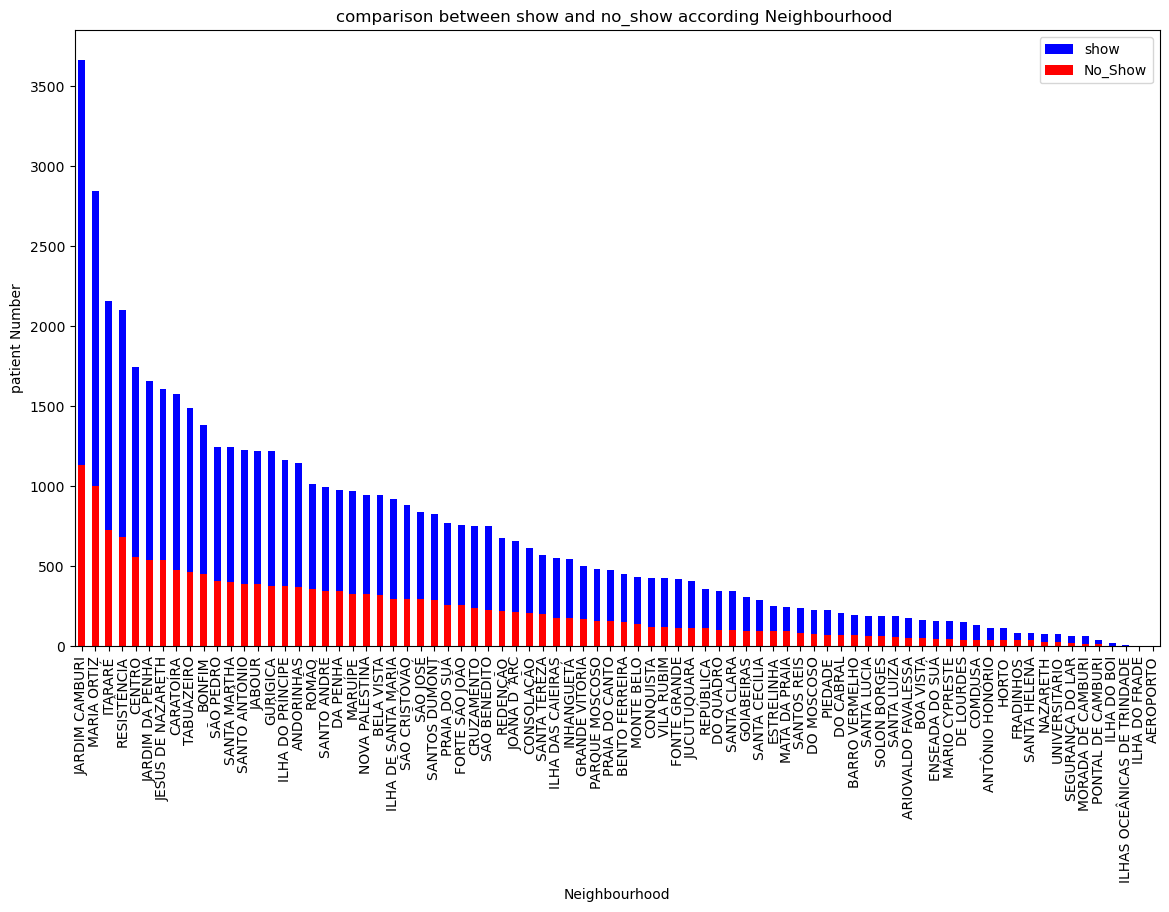

In [33]:
#does neighbourhood affect the attendance 
plt.figure(figsize=[14,8])
show_df["Neighbourhood"].value_counts().plot(kind="bar",color="blue",label="show")
NoShow_df["Neighbourhood"].value_counts().plot(kind="bar",color="red",label="No_Show")
plt.legend()
plt.title("comparison between show and no_show according Neighbourhood ")
plt.xlabel("Neighbourhood")
plt.ylabel("patient Number")
plt.show()

##### Neighbourhood  has a great effect on attendence or not , JARDIM CAMBURI has the greatest showing rate 

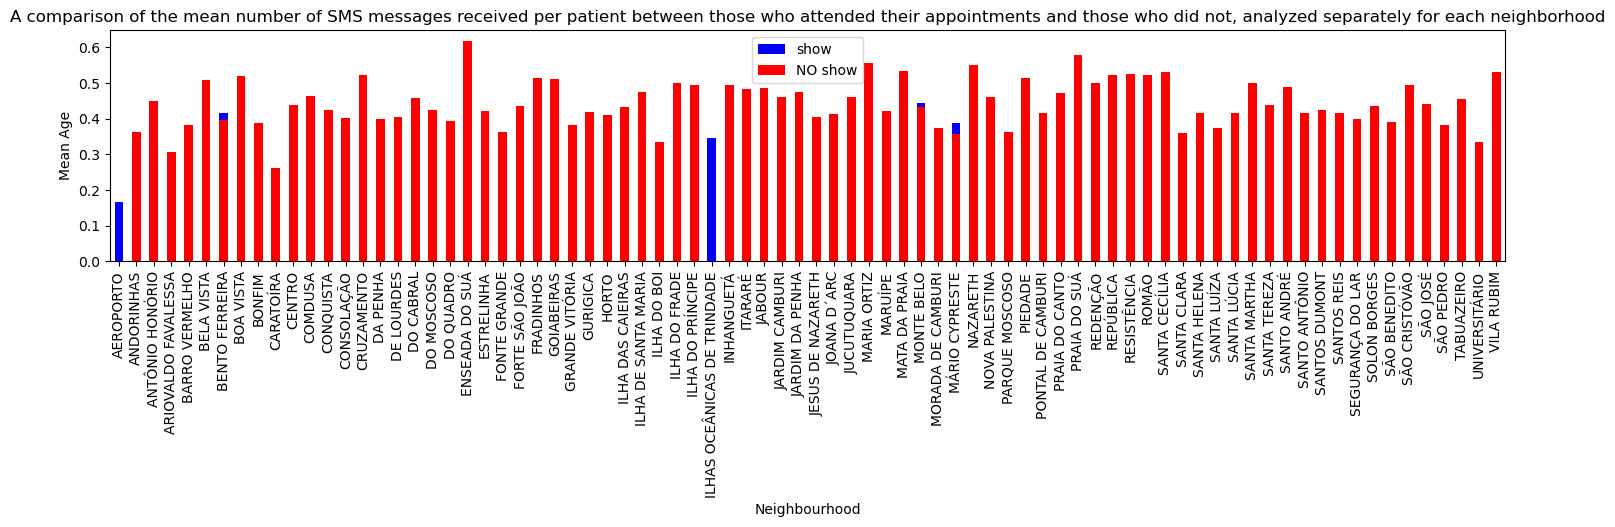

In [34]:
plt.figure(figsize=[18,3])
show_df.groupby("Neighbourhood")["SMS_received"].mean().plot(kind="bar",color="blue",label="show")
NoShow_df.groupby("Neighbourhood")["SMS_received"].mean().plot(kind="bar",color="red",label="NO show")
plt.legend()
plt.title("A comparison of the mean number of SMS messages received per patient between those who attended their appointments and those who did not, analyzed separately for each neighborhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Mean Age")
plt.show()

#### In most neighborhoods, patients who did not attend their appointments received a higher mean number of SMS messages compared to those who did attend. However, there were two neighborhoods where none of the non-attending patients received any SMS messages. Conversely, there were three neighborhoods where the patients who attended their appointments received slightly more SMS messages on average than those who did not attend. Based on these findings, the SMS campaign strategy should be revised

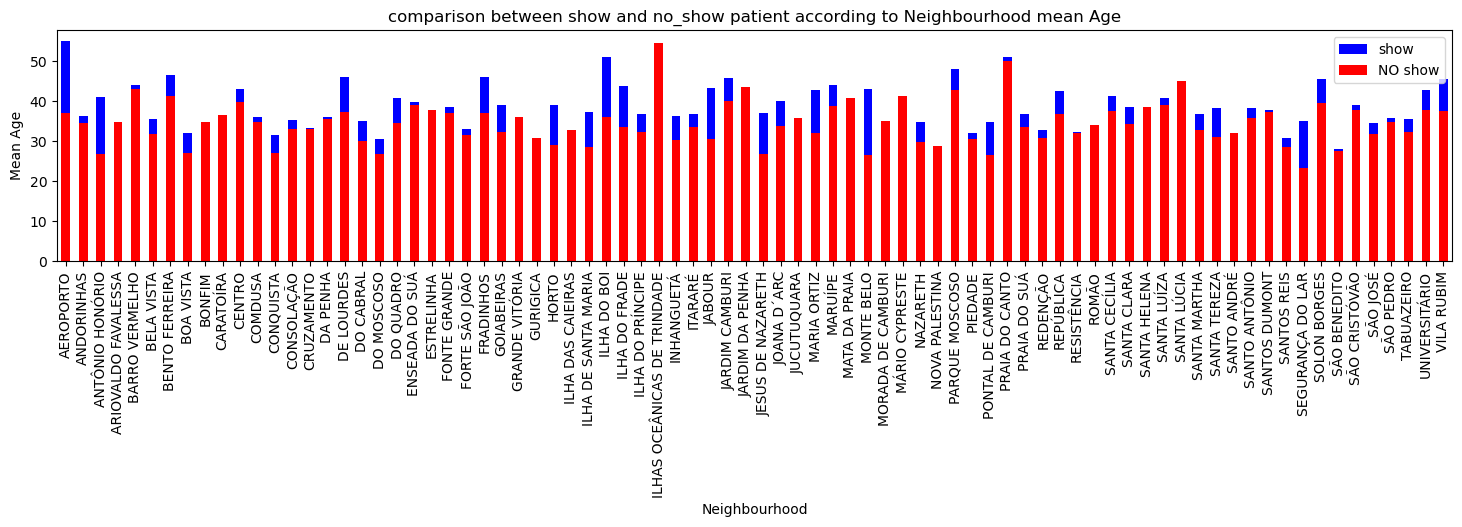

In [35]:
plt.figure(figsize=[18,3])
show_df.groupby('Neighbourhood')["Age"].mean().plot(kind="bar",color="blue",label="show")
NoShow_df.groupby('Neighbourhood')["Age"].mean().plot(kind="bar",color="red",label="NO show")
plt.legend()
plt.title("comparison between show and no_show patient according to Neighbourhood mean Age")
plt.xlabel("Neighbourhood")
plt.ylabel("Mean Age")
plt.show()

#### patient attendance from  specific neighbourhood differ according to Ages of patients 

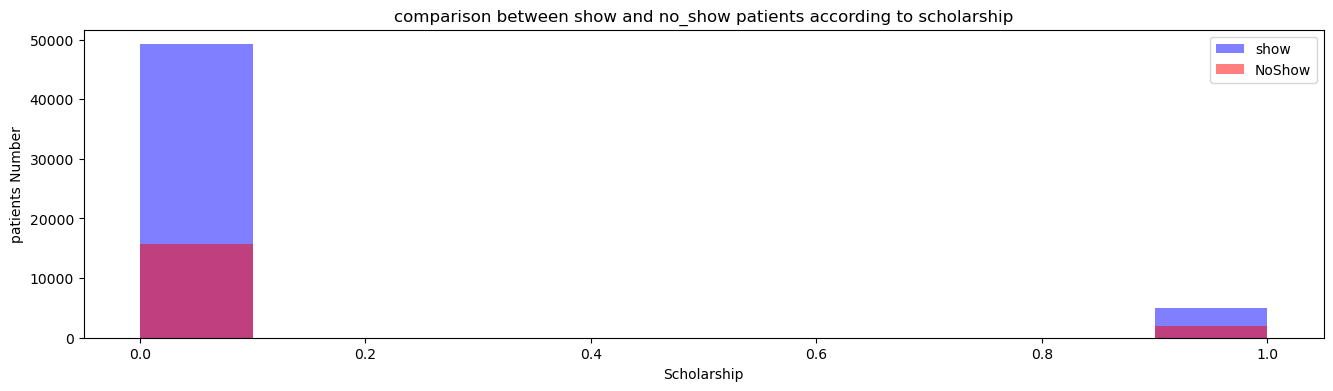

In [36]:
attendncee(show_df,NoShow_df,"Scholarship","comparison between show and no_show patients according to scholarship","Scholarship","patients Number")

#### Number of showing patients without applaying to the scholarship  is greater than showing patients with applay to  scholarship 

###   Conclusion 

####  Neighbourhood  has a great effect on attendence or not , JARDIM CAMBURI has the greatest showing rate 
#### patient attendance from  specific neighbourhood differ according to Ages and SmS  of patients 
#### Ages has a clear influnce on the showing rate , Children aged 10 and under have the highest attendance,Those aged 48 to 58 have the second highest attendance Attendance begins to decrease as people get older
#### Number of showing patients without reciving sms is greater than shoing patients with reciving SMS, we need to revisite our sms campain 
#### Number of showing patients without applaying to the scholarship  is greater than showing patients with applay to  scholarship
